In [229]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

In [230]:
zipped_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

# Files to unzip (from your screenshot)
files_to_unzip = [
    "rt.movie_info.tsv.gz",
    "tmdb.movies.csv.gz",
    "tn.movie_budgets.csv.gz",
    "bom.movie_gross.csv.gz",
]

for gz_file in files_to_unzip:
    # Full path to compressed file
    gz_path = os.path.join(zipped_folder, gz_file)
    
    # Remove .gz extension for output file
    output_file = os.path.join(zipped_folder, gz_file[:-3])  # removes last 3 chars (.gz)

In [231]:
data_folder = r"C:\Users\HP\OneDrive\Desktop\MYPROJECT\zipped data"

In [232]:
db_path = r"C:\Users\HP\Desktop\MYPROJECT\im.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [233]:
merge= """SELECT *
                FROM principals
                JOIN movie_akas USING (movie_id)
                JOIN movie_basics USING (movie_id)
                JOIN movie_ratings USING (movie_id)
                JOIN persons USING (person_id);"""

merge_df = pd.read_sql_query(merge,conn)
merge_df.head()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"


In [234]:
merge_df.copy()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",1,Malchik Russkiy,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422862,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",2,A Russian Youth,XWW,en,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422863,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",3,Malchik russkiy,None,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor
2422864,tt9681728,9,nm10397910,actor,None,"[""Corpsman""]",4,Мальчик русский,RU,None,...,Malchik russkiy,2019,72.0,"Drama,War",6.6,34,Danil Tyabin,NaN,NaN,actor


In [235]:
merge_df.isnull().sum()

movie_id                    0
ordering                    0
person_id                   0
category                    0
job                   1757131
characters            1468512
ordering                    0
title                       0
region                 393739
language              2073586
types                  974092
attributes            2301142
is_original_title           0
primary_title               0
original_title              0
start_year                  0
runtime_minutes         95004
genres                   9057
averagerating               0
numvotes                    0
primary_name                0
birth_year            1367955
death_year            2380448
primary_profession      52454
dtype: int64

In [236]:
# Find columns to drop using lambda
cols_to_drop = merge_df.columns[merge_df.isnull().apply(lambda x: x.mean() > 0.4)]

# Drop these columns
merge_df_clean = merge_df.drop(columns=cols_to_drop)
merge_df_clean.isnull().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
ordering                   0
title                      0
region                393739
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        95004
genres                  9057
averagerating              0
numvotes                   0
primary_name               0
primary_profession     52454
dtype: int64

In [237]:
merge_df_clean = merge_df_clean.dropna()
merge_df_clean.isnull().sum()

movie_id              0
ordering              0
person_id             0
category              0
ordering              0
title                 0
region                0
is_original_title     0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
dtype: int64

In [238]:
rt = {}  # Define the dictionary first
rt['movie_info.tsv'] = pd.read_csv(
    os.path.join(zipped_folder, "rt.movie_info.tsv"),
    encoding='utf-8',
    sep='\t'  # For TSV format
)
rt['movie_info.tsv'].head()
rt['movie_info.tsv'].isnull().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [239]:
rt['movie_info.tsv'].fillna(0).select_dtypes(include='number').sum()
# Fill numeric columns with 0, text columns with 'unknown'
rt['movie_info.tsv'] = rt['movie_info.tsv'].fillna({
    col: 0 if rt['movie_info.tsv'][col].dtype.kind in 'iufc' else 'unknown'
    for col in rt['movie_info.tsv'].columns
})
rt['movie_info.tsv'].isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [240]:
rt['movie_info.tsv']['rating'].value_counts()

rating
R          521
NR         503
PG         240
PG-13      235
G           57
unknown      3
NC17         1
Name: count, dtype: int64

In [241]:
# Load the datasets
tn_movies = pd.read_csv(
        os.path.join(data_folder, "tn.movie_budgets.csv"),
        encoding='utf-8'
    )
tn_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [242]:
tn_movies.info()
tn_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [243]:
# creating a clean copy of the dataframe
clean_movies = tn_movies.copy()

In [244]:
# Load the datasets
bom_movies = pd.read_csv(
        os.path.join(data_folder, "bom.movie_gross.csv.gz"),
        encoding='utf-8'
    )
bom_movies.head()
bom_movies.info()
bom_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [245]:
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [246]:
# 1. Converting to string 
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].astype(str)

#  Removing commas
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '')

#  Converting back to numbers
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')
# Filling missing values
bom_movies['domestic_gross'] = bom_movies['domestic_gross'].fillna(0)
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].fillna(0)
bom_movies['studio'] = bom_movies['studio'].fillna('Unknown')

# Sum numeric columns
bom_movies.select_dtypes(include='number').sum()


domestic_gross    9.655729e+10
foreign_gross     1.525159e+11
year              6.821276e+06
dtype: float64

In [247]:
# Load the datasets
tmdb_movies = pd.read_csv(
        os.path.join(data_folder, "tmdb.movies.csv.gz"),
        encoding='utf-8'
    )
tmdb_movies.info()
tmdb_movies.isnull().sum()
tmdb_movies.head()
tmdb_movies.info()
tmdb_movies.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [248]:
# lets merge the tmdb_movies and bom_movies datasets
merged= pd.merge(tmdb_movies, bom_movies, left_on='title', right_on='title', how='inner')
merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


In [249]:
merged.info()
merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2703 non-null   object 
 11  domestic_gross     2703 non-null   float64
 12  foreign_gross      2703 non-null   float64
 13  year               2703 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 295.8+ KB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

In [250]:
merged.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
studio                object
domestic_gross       float64
foreign_gross        float64
year                   int64
dtype: object

In [251]:
# Filling missing studio names
merged['studio'] = merged['studio'].fillna('Unknown')
# Filling missing domestic_gross with 0
merged['domestic_gross'] = merged['domestic_gross'].fillna(0)
#Converting foreign_gross to numeric  and filling missing with 0
merged['foreign_gross'] = pd.to_numeric(merged['foreign_gross'], errors='coerce')
merged['foreign_gross'] = merged['foreign_gross'].fillna(0)
merged.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

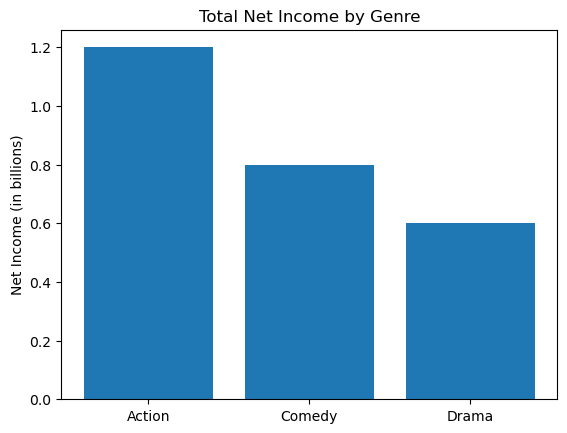

In [252]:
# creating a new column for net income.
# Net Income = Domestic Gross + Foreign Gross
merged['net_income'] = merged['domestic_gross'] + merged['foreign_gross']
# Grouping by genre and calculating the total net income for each genre
genre_income = merged.groupby('genre_ids')['net_income'].sum().sort_values(ascending=False)
# plotting
genres = ["Action", "Comedy", "Drama"]
net_income = [1.2, 0.8, 0.6]

plt.bar(genres, net_income)
plt.title("Total Net Income by Genre")
plt.ylabel("Net Income (in billions)")
plt.show()

In [253]:
# Merging the two DataFrames
merged_df_1 = pd.merge(merged,clean_movies, left_on='title', right_on='movie')
merged_df_1.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,domestic_gross_x,foreign_gross,year,net_income,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,217600000.0,277300000.0,2010,4.949000e+08,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,312400000.0,311500000.0,2010,6.239000e+08,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,292600000.0,535700000.0,2010,8.283000e+08,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,415000000.0,652000000.0,2010,1.067000e+09,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,251500000.0,291600000.0,2010,5.431000e+08,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"


In [254]:
merged_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title              1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  studio             1395 non-null   object 
 11  domestic_gross_x   1395 non-null   float64
 12  foreign_gross      1395 non-null   float64
 13  year               1395 non-null   int64  
 14  net_income         1395 non-null   float64
 15  id_y               1395 non-null   int64  
 16  release_date_y     1395 

In [255]:
#lets see how many rows we would have if we only merged gross and budget
merged_df_2 = pd.merge( bom_movies,clean_movies,left_on='title',right_on='movie')
merged_df_2.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [256]:
merged_df_2.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [257]:
merged_df_2.dtypes

title                 object
studio                object
domestic_gross_x     float64
foreign_gross        float64
year                   int64
id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross_y      object
worldwide_gross       object
dtype: object

In [258]:
# Ensuring foreign_gross is a string 
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].astype(str)

# Removing commas and currency symbols and convert to float
merged_df_2['foreign_gross'] = (
    merged_df_2['foreign_gross']
    .str.replace('[$,]', '', regex=True)
    .astype(float)
)

# Filling any NaN values in foreign_gross with 0
merged_df_2['foreign_gross'] = merged_df_2['foreign_gross'].fillna(0)

# Filling missing values in domestic_gross_x with the median value
median_x = merged_df_2['domestic_gross_x'].median()
merged_df_2['domestic_gross_x'] = merged_df_2['domestic_gross_x'].fillna(median_x)

# Filling missing studio names with 'Unknown'
merged_df_2['studio'] = merged_df_2['studio'].fillna("Unknown")
merged_df_2.isnull().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [259]:
merged_df_1.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'net_income', 'id_y', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [260]:
numeric_cols = merged_df_2.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['domestic_gross_x', 'foreign_gross', 'year', 'id']


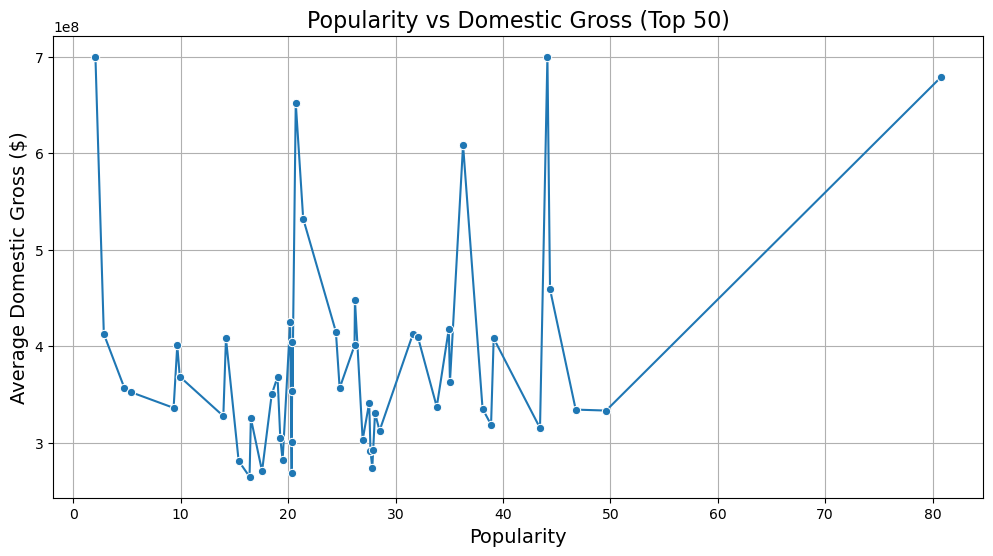

In [261]:
# Group by popularity and calculate mean domestic gross
pop_domGross = merged_df_1.groupby('popularity')['domestic_gross_x'].mean().sort_values(ascending=False)

# Take top 50
pop_domGross_top_50 = pop_domGross.head(50)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=pop_domGross_top_50.index, y=pop_domGross_top_50.values, marker='o')

ax.set_title('Popularity vs Domestic Gross (Top 50)', fontsize=16)
ax.set_xlabel('Popularity', fontsize=14)
ax.set_ylabel('Average Domestic Gross ($)', fontsize=14)
ax.grid(True)

plt.show()

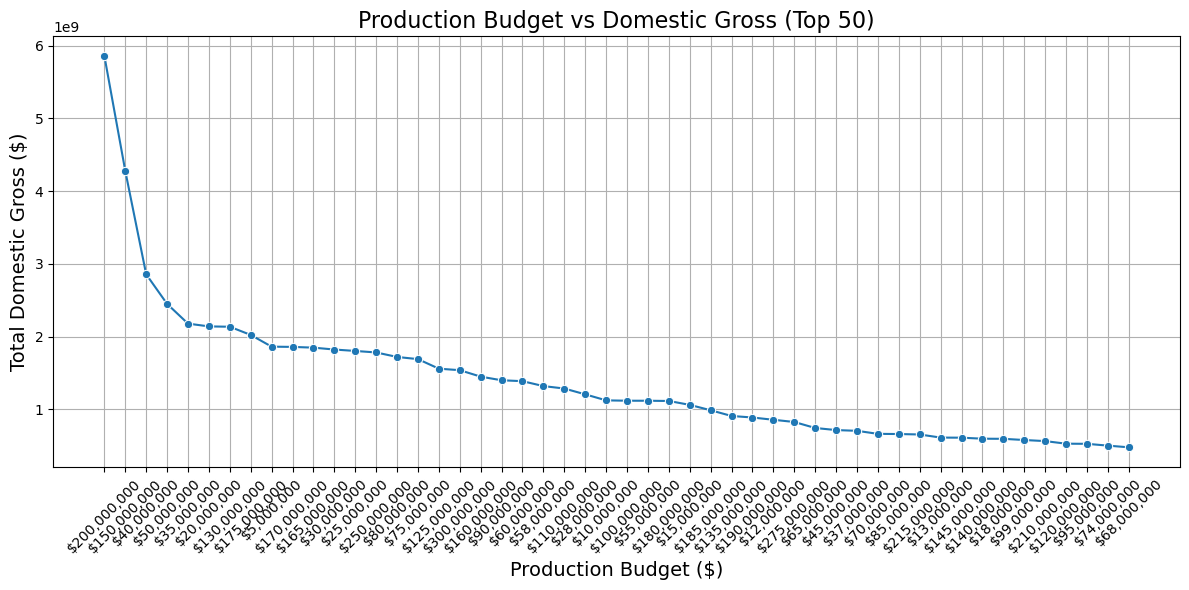

In [262]:
# Grouping by production budget and summing gross
budget_vs_gross = merged_df_1.groupby('production_budget')['domestic_gross_x'].sum().sort_values(ascending=False)

# Taking top 50
budget_vs_gross_top_50 = budget_vs_gross.head(50)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=budget_vs_gross_top_50.index, y=budget_vs_gross_top_50.values, marker='o')

ax.set_title('Production Budget vs Domestic Gross (Top 50)', fontsize=16)
ax.set_xlabel('Production Budget ($)', fontsize=14)
ax.set_ylabel('Total Domestic Gross ($)', fontsize=14)
ax.grid(True)

# Optional: Rotate x labels if needed
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [263]:
imdb_gross_combine = pd.merge(merge_df,bom_movies,on='title')
imdb_gross_combine

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,studio,domestic_gross,foreign_gross,year
0,tt0475290,10,nm0005683,cinematographer,director of photography,None,24,"Hail, Caesar!",GB,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
1,tt0475290,10,nm0005683,cinematographer,director of photography,None,29,"Hail, Caesar!",None,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
2,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
3,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",29,"Hail, Caesar!",None,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
4,tt0475290,2,nm0000123,actor,None,"[""Baird Whitlock""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,George Clooney,1961.0,NaN,"actor,producer,director",Uni.,30500000.0,33100000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104647,tt8923482,7,nm4388506,composer,None,None,3,Born in China,US,None,...,7.5,103,Nathan Halpern,NaN,NaN,"composer,music_department,soundtrack",BV,13900000.0,11200000.0,2017
104648,tt8923482,8,nm1848623,composer,None,None,2,Born in China,None,None,...,7.5,103,Chris Ruggiero,NaN,NaN,"composer,music_department,sound_department",BV,13900000.0,11200000.0,2017
104649,tt8923482,8,nm1848623,composer,None,None,3,Born in China,US,None,...,7.5,103,Chris Ruggiero,NaN,NaN,"composer,music_department,sound_department",BV,13900000.0,11200000.0,2017
104650,tt8923482,9,nm4190618,cinematographer,director of photography,None,2,Born in China,None,None,...,7.5,103,Yuanchen Liu,NaN,NaN,"cinematographer,producer,director",BV,13900000.0,11200000.0,2017


In [264]:
imdb_gross_combine.isnull().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
job                    65644
characters             62699
ordering                   0
title                      0
region                 22783
language               87352
types                  23989
attributes            101254
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes          475
genres                    67
averagerating              0
numvotes                   0
primary_name               0
birth_year             40637
death_year            102030
primary_profession       720
studio                     0
domestic_gross             0
foreign_gross              0
year                       0
dtype: int64

In [265]:
# First, check the data types
imdb_gross_combine.dtypes

movie_id               object
ordering                int64
person_id              object
category               object
job                    object
characters             object
ordering                int64
title                  object
region                 object
language               object
types                  object
attributes             object
is_original_title     float64
primary_title          object
original_title         object
start_year              int64
runtime_minutes       float64
genres                 object
averagerating         float64
numvotes                int64
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
studio                 object
domestic_gross        float64
foreign_gross         float64
year                    int64
dtype: object

In [266]:
# Converting foreign_gross to numeric, coercing errors (like strings) into NaN
imdb_gross_combine['foreign_gross'] = pd.to_numeric(imdb_gross_combine['foreign_gross'], errors='coerce')

# Filling missing domestic_gross with 0
imdb_gross_combine['domestic_gross'] = imdb_gross_combine['domestic_gross'].fillna(0)

# Filling missing foreign_gross with 0
imdb_gross_combine['foreign_gross'] = imdb_gross_combine['foreign_gross'].fillna(0)
imdb_gross_combine.isnull().sum()

movie_id                   0
ordering                   0
person_id                  0
category                   0
job                    65644
characters             62699
ordering                   0
title                      0
region                 22783
language               87352
types                  23989
attributes            101254
is_original_title          0
primary_title              0
original_title             0
start_year                 0
runtime_minutes          475
genres                    67
averagerating              0
numvotes                   0
primary_name               0
birth_year             40637
death_year            102030
primary_profession       720
studio                     0
domestic_gross             0
foreign_gross              0
year                       0
dtype: int64

In [267]:
# Drop rows with missing values
imdb_gross_combine_cleaned = imdb_gross_combine.dropna()
imdb_gross_combine_cleaned.isnull().sum()

movie_id              0
ordering              0
person_id             0
category              0
job                   0
characters            0
ordering              0
title                 0
region                0
language              0
types                 0
attributes            0
is_original_title     0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
studio                0
domestic_gross        0
foreign_gross         0
year                  0
dtype: int64

In [268]:
imdb_gross_combine.head()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession,studio,domestic_gross,foreign_gross,year
0,tt0475290,10,nm0005683,cinematographer,director of photography,None,24,"Hail, Caesar!",GB,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
1,tt0475290,10,nm0005683,cinematographer,director of photography,None,29,"Hail, Caesar!",None,None,...,6.3,111422,Roger Deakins,1949.0,NaN,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000.0,2016
2,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
3,tt0475290,1,nm0000982,actor,None,"[""Eddie Mannix""]",29,"Hail, Caesar!",None,None,...,6.3,111422,Josh Brolin,1968.0,NaN,"actor,producer,writer",Uni.,30500000.0,33100000.0,2016
4,tt0475290,2,nm0000123,actor,None,"[""Baird Whitlock""]",24,"Hail, Caesar!",GB,None,...,6.3,111422,George Clooney,1961.0,NaN,"actor,producer,director",Uni.,30500000.0,33100000.0,2016


In [269]:
final_combined = pd.merge(imdb_gross_combine,tn_movies,left_on='title',right_on='movie')
final_combined.head()
final_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58713 entries, 0 to 58712
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            58713 non-null  object 
 1   ordering            58713 non-null  int64  
 2   person_id           58713 non-null  object 
 3   category            58713 non-null  object 
 4   job                 23763 non-null  object 
 5   characters          23507 non-null  object 
 6   ordering            58713 non-null  int64  
 7   title               58713 non-null  object 
 8   region              46188 non-null  object 
 9   language            8341 non-null   object 
 10  types               46523 non-null  object 
 11  attributes          1706 non-null   object 
 12  is_original_title   58713 non-null  float64
 13  primary_title       58713 non-null  object 
 14  original_title      58713 non-null  object 
 15  start_year          58713 non-null  int64  
 16  runt

In [270]:
final_combined.isnull().sum()

movie_id                  0
ordering                  0
person_id                 0
category                  0
job                   34950
characters            35206
ordering                  0
title                     0
region                12525
language              50372
types                 12190
attributes            57007
is_original_title         0
primary_title             0
original_title            0
start_year                0
runtime_minutes         279
genres                   48
averagerating             0
numvotes                  0
primary_name              0
birth_year            19058
death_year            57073
primary_profession      104
studio                    0
domestic_gross_x          0
foreign_gross             0
year                      0
id                        0
release_date              0
movie                     0
production_budget         0
domestic_gross_y          0
worldwide_gross           0
dtype: int64

In [271]:
# Dropping unnecessary columns
final_combined = final_combined.drop(columns=[
    'job', 'characters', 'region', 'language', 'types', 'attributes',
    'birth_year', 'death_year', 'primary_profession'
], errors='ignore')


# Filling missing numeric values with median
final_combined['runtime_minutes'] = final_combined['runtime_minutes'].fillna(final_combined['runtime_minutes'].median())

# Filling missing text values with 'Unknown'
final_combined['genres'] = final_combined['genres'].fillna('Unknown')
final_combined['title'] = final_combined['title'].fillna('Unknown')
final_combined['studio'] = final_combined['studio'].fillna('Unknown')
final_combined['movie'] = final_combined['movie'].fillna('Unknown')
final_combined.isnull().sum()


movie_id             0
ordering             0
person_id            0
category             0
ordering             0
title                0
is_original_title    0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
primary_name         0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [272]:
# Removing the dollar sign and commas, then convert to numeric
for column in ['production_budget', 'domestic_gross_y','worldwide_gross']:
    final_combined[column] = final_combined[column].astype(str)  
    final_combined[column] = final_combined[column].str.replace('$', '').str.replace(',', '')
    final_combined[column] = pd.to_numeric(final_combined[column], errors='coerce')


In [273]:
final_combined.head()

,movie_id,ordering,person_id,category,ordering,title,is_original_title,primary_title,original_title,start_year,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,Uni.,30500000.0,33100000.0,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
1,tt0475290,10,nm0005683,cinematographer,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,Uni.,30500000.0,33100000.0,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
2,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,Uni.,30500000.0,33100000.0,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
3,tt0475290,1,nm0000982,actor,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,Uni.,30500000.0,33100000.0,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680
4,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,Uni.,30500000.0,33100000.0,2016,22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680


In [274]:
movies_full_data= pd.merge(final_combined,tmdb_movies,on='title')
movies_full_data.head()

,movie_id,ordering,person_id,category,ordering,title,is_original_title,primary_title,original_title_x,start_year,...,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,64160680,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
1,tt0475290,10,nm0005683,cinematographer,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,64160680,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
2,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,64160680,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
3,tt0475290,1,nm0000982,actor,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,64160680,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
4,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,64160680,17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328


In [275]:
movies_full_data = movies_full_data.drop(columns=['Unnamed: 0'], errors='ignore')
movies_full_data.head()

,movie_id,ordering,person_id,category,ordering,title,is_original_title,primary_title,original_title_x,start_year,...,domestic_gross_y,worldwide_gross,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
1,tt0475290,10,nm0005683,cinematographer,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
2,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
3,tt0475290,1,nm0000982,actor,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
4,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328


In [276]:
movies_full_data.isnull().sum()

movie_id             0
ordering             0
person_id            0
category             0
ordering             0
title                0
is_original_title    0
primary_title        0
original_title_x     0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
primary_name         0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
release_date_x       0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
genre_ids            0
id_y                 0
original_language    0
original_title_y     0
popularity           0
release_date_y       0
vote_average         0
vote_count           0
dtype: int64

In [277]:
# Checking for any duplicate rows
duplicates=movies_full_data[movies_full_data.duplicated() | movies_full_data.duplicated(keep=False)]
# Drop fully duplicated rows
movies_full_data = movies_full_data.drop_duplicates()


In [278]:
movies_full_data = movies_full_data.reset_index(drop=True)
movies_full_data.head()

,movie_id,ordering,person_id,category,ordering,title,is_original_title,primary_title,original_title_x,start_year,...,domestic_gross_y,worldwide_gross,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
1,tt0475290,10,nm0005683,cinematographer,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
2,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
3,tt0475290,1,nm0000982,actor,29,"Hail, Caesar!",1.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
4,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",0.0,"Hail, Caesar!","Hail, Caesar!",2016,...,30080225,64160680,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328


In [279]:
genre_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

merged['genres'] = merged['genre_ids'].apply(
    lambda x: [genre_map.get(g, "Unknown") for g in eval(x)]
)

In [280]:
genre_income = merged.explode('genres').groupby('genres')['net_income'].sum().sort_values(ascending=False)

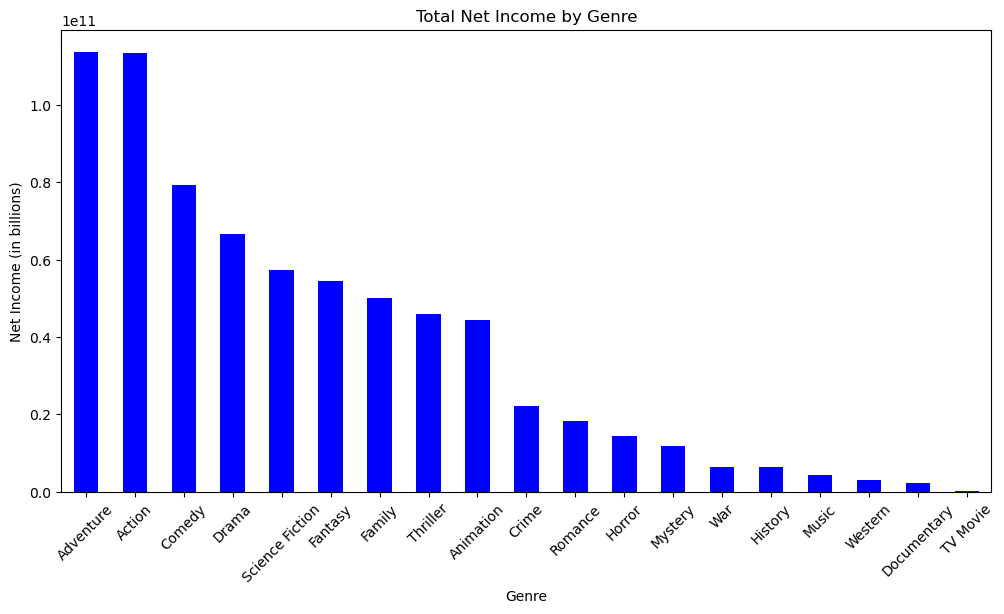

In [281]:
plt.figure(figsize=(12, 6))
genre_income.plot(kind='bar', color='blue')
plt.title("Total Net Income by Genre")
plt.xlabel("Genre")
plt.ylabel("Net Income (in billions)")
plt.xticks(rotation=45)
plt.show()

In [282]:
print(merged.columns.tolist())


['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'net_income', 'genres']


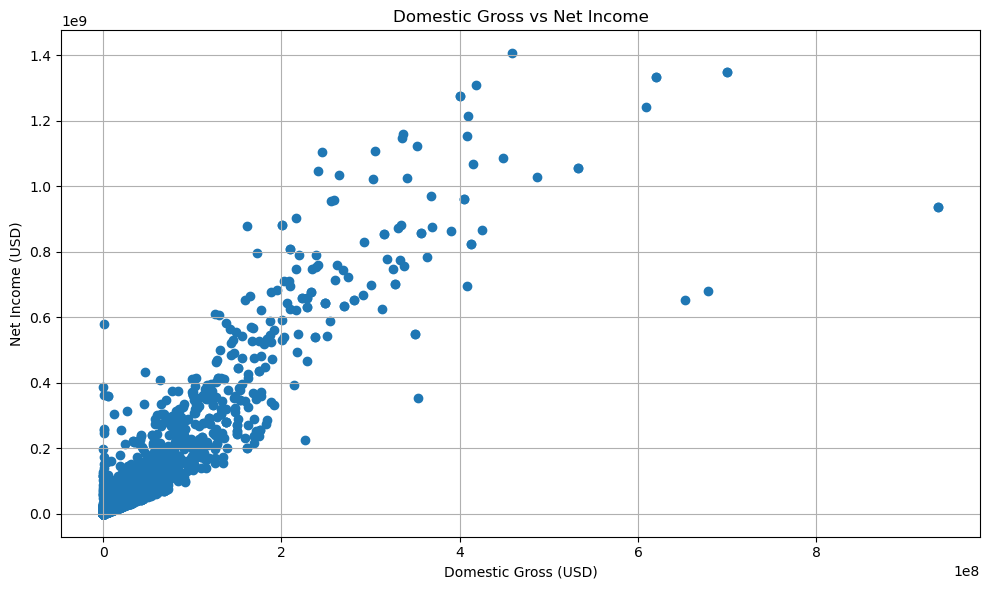

In [283]:
merged['domestic_gross_cleaned'] = pd.to_numeric(
    merged['domestic_gross'].astype(str).str.replace('[$,]', '', regex=True),
    errors='coerce'
)
plt.figure(figsize=(10, 6))
plt.scatter(
    merged['domestic_gross_cleaned'],
    merged['net_income']
)
plt.title('Domestic Gross vs Net Income')
plt.xlabel('Domestic Gross (USD)')
plt.ylabel('Net Income (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [308]:
# Convert financial columns to numeric
def money_to_float(money_str):
    if isinstance(money_str, str):
        return float(money_str.replace('$', '').replace(',', ''))
    return money_str

merged_df_2['production_budget'] = merged_df_2['production_budget'].apply(money_to_float)
merged_df_2['worldwide_gross'] = merged_df_2['worldwide_gross'].apply(money_to_float)

# Calculate median budget to split into high/low groups
median_budget = merged_df_2['production_budget'].median()

high_budget = merged_df_2[merged_df_2['production_budget'] > median_budget]['worldwide_gross']
low_budget = merged_df_2[merged_df_2['production_budget'] <= median_budget]['worldwide_gross']

# Check variance equality
from scipy.stats import levene
levene_stat, levene_p = levene(high_budget, low_budget)
equal_var = levene_p > 0.05

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(high_budget, low_budget, equal_var=equal_var)

print(f"Median budget: ${median_budget:,.2f}")
print(f"High budget movies mean gross: ${high_budget.mean():,.2f}")
print(f"Low budget movies mean gross: ${low_budget.mean():,.2f}")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis - there is a significant difference")
else:
    print("Fail to reject null hypothesis - no significant difference")

Median budget: $25,000,000.00
High budget movies mean gross: $263,067,219.17
Low budget movies mean gross: $41,717,091.08
T-statistic: 18.80, p-value: 0.0000
Reject null hypothesis - there is a significant difference
